**DATATHON**

In [178]:
import pandas as pd
from PIL import Image
from IPython.display import display

In [179]:
product = pd.read_csv('product_data.csv')
outfit = pd.read_csv('outfit_data.csv')

**PREPROCESS**

In [180]:
#Given an code outfit, return the products of the outfit
def prod_outfits(cod_outfit, outfit):
    outfit_products = list(outfit[outfit['cod_outfit'] == cod_outfit]['cod_modelo_color'])
    #We have to do the join
    prod_fil = product[product['cod_modelo_color'].isin(outfit_products)]
    return prod_fil

In [181]:
def show_image(outfit, dire='datathon/images/', show=True):
    img_nombres = list(outfit['des_filename'])

    for nombre_img in img_nombres:
        # Eliminar 'datathon/images/' de la ruta del archivo
        r_img = str(nombre_img).replace(dire, '')

        img = Image.open(dire + r_img)

        if show:
            display(img)


In [182]:
o = prod_outfits(7503,outfit)
o

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename
128,53091077-30,30,MARRON,BROWN,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Footwear,Shoes,datathon/images/2019_53091077_30.jpg
256,53033766-OR,OR,ORO,WHITE,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Necklace,datathon/images/2019_53033766_OR.jpg
682,53053763-30,30,MARRON,BROWN,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Bracelet,datathon/images/2019_53053763_30.jpg
983,53060847-OR,OR,ORO,WHITE,Female,Adult,VIOLETA,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Necklace,datathon/images/2019_53060847_OR.jpg
2659,53091158-OR,OR,ORO,WHITE,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Jewellery,Ring,datathon/images/2019_53091158_OR.jpg
5188,57037651-77,77,VINO,RED,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Footwear,Ankle Boots,datathon/images/2019_57037651_77.jpg
8209,57094382-99,99,NEGRO,GREY,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_57094382_99.jpg


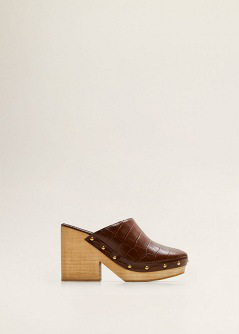

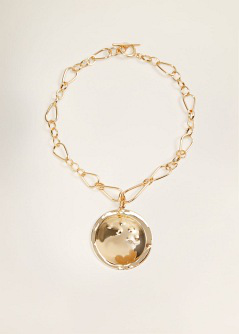

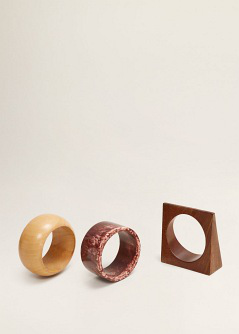

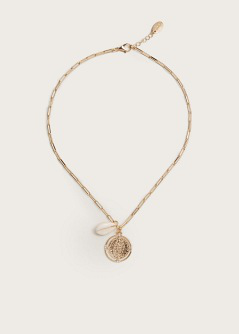

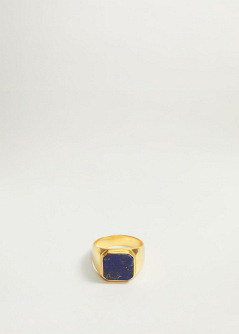

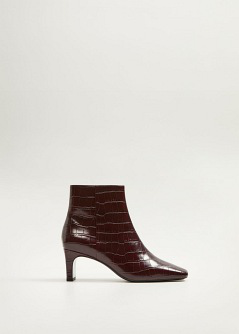

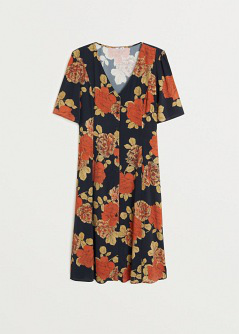

In [183]:
show_image(o)

In [184]:
product.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename
0,41085800-02,02,OFFWHITE,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg
1,53000586-TO,TO,TEJANO OSCURO,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg
2,53030601-81,81,ROSA PASTEL,PINK,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53030601_81.jpg
3,53050730-15,15,MOSTAZA,YELLOW,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53050730_15.jpg
4,53070773-70,70,ROJO,RED,Female,Adult,SHE,P-PLANA,Tops,Shirts,Shirt,Shirt,datathon/images/2019_53070773_70.jpg


In [185]:
product.shape

(9222, 13)

Borramos las columnas que definen color en string ya que ya tenemos una columna que indica los colores ordenados en funcion de si es claro o oscura. Es cierto que primero debemos modificar esta columna de número ya que tenemos valores con letras. Además aplicaremos one-hot encoding al género i a l'edat

In [186]:
one_hot_encoded = pd.get_dummies(product['des_sex'], prefix='sex')
product_1 = pd.concat([product, one_hot_encoded], axis=1)

In [187]:
one_hot_encoded_1 = pd.get_dummies(product_1['des_age'], prefix='age')
product_2 = pd.concat([product_1, one_hot_encoded_1], axis=1)

In [188]:
product_2.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename,sex_Female,sex_Male,sex_Unisex,age_Adult,age_Kids
0,41085800-02,02,OFFWHITE,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,1,0,0,1,0
1,53000586-TO,TO,TEJANO OSCURO,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg,1,0,0,1,0
2,53030601-81,81,ROSA PASTEL,PINK,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53030601_81.jpg,1,0,0,1,0
3,53050730-15,15,MOSTAZA,YELLOW,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53050730_15.jpg,1,0,0,1,0
4,53070773-70,70,ROJO,RED,Female,Adult,SHE,P-PLANA,Tops,Shirts,Shirt,Shirt,datathon/images/2019_53070773_70.jpg,1,0,0,1,0


Borramos la columna "des_sex", "des_age" ya que ya hemos hecho one-hot encoding

In [189]:
product_3 = product_2.drop(['des_sex','des_age'], axis=1)

In [190]:
product_3.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename,sex_Female,sex_Male,sex_Unisex,age_Adult,age_Kids
0,41085800-02,02,OFFWHITE,WHITE,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,1,0,0,1,0
1,53000586-TO,TO,TEJANO OSCURO,BLUE,SHE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg,1,0,0,1,0
2,53030601-81,81,ROSA PASTEL,PINK,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53030601_81.jpg,1,0,0,1,0
3,53050730-15,15,MOSTAZA,YELLOW,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53050730_15.jpg,1,0,0,1,0
4,53070773-70,70,ROJO,RED,SHE,P-PLANA,Tops,Shirts,Shirt,Shirt,datathon/images/2019_53070773_70.jpg,1,0,0,1,0


Eliminamos también las columnas "des_product_aggregated_family" y "des_product_family"

In [191]:
product_4 = product_3.drop(['des_product_aggregated_family','des_product_family'], axis=1)

In [192]:
product_4.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_line,des_fabric,des_product_category,des_product_type,des_filename,sex_Female,sex_Male,sex_Unisex,age_Adult,age_Kids
0,41085800-02,02,OFFWHITE,WHITE,SHE,P-PLANA,Bottoms,Trousers,datathon/images/2019_41085800_02.jpg,1,0,0,1,0
1,53000586-TO,TO,TEJANO OSCURO,BLUE,SHE,J-JEANS,Bottoms,Jeans,datathon/images/2019_53000586_TO.jpg,1,0,0,1,0
2,53030601-81,81,ROSA PASTEL,PINK,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53030601_81.jpg,1,0,0,1,0
3,53050730-15,15,MOSTAZA,YELLOW,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53050730_15.jpg,1,0,0,1,0
4,53070773-70,70,ROJO,RED,SHE,P-PLANA,Tops,Shirt,datathon/images/2019_53070773_70.jpg,1,0,0,1,0


In [193]:
v_subs = ['TO','TM','TU','CU','TC','TN','DI','CO','TA','TL','TG','DO','BL','BB','TS','GM','DC','PL','OR','CG']

In [194]:
col = list(product['des_agrup_color_eng'].unique())
col

['WHITE',
 'BLUE',
 'PINK',
 'YELLOW',
 'RED',
 'GREY',
 'BROWN',
 'PURPLE',
 'GREEN',
 'ORANGE']

In [195]:
product_4['cod_color_code'] = [int(el.lstrip('0')) if el.isdigit() else el for el in product_4['cod_color_code']]

In [196]:
product_4.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_line,des_fabric,des_product_category,des_product_type,des_filename,sex_Female,sex_Male,sex_Unisex,age_Adult,age_Kids
0,41085800-02,2,OFFWHITE,WHITE,SHE,P-PLANA,Bottoms,Trousers,datathon/images/2019_41085800_02.jpg,1,0,0,1,0
1,53000586-TO,TO,TEJANO OSCURO,BLUE,SHE,J-JEANS,Bottoms,Jeans,datathon/images/2019_53000586_TO.jpg,1,0,0,1,0
2,53030601-81,81,ROSA PASTEL,PINK,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53030601_81.jpg,1,0,0,1,0
3,53050730-15,15,MOSTAZA,YELLOW,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53050730_15.jpg,1,0,0,1,0
4,53070773-70,70,ROJO,RED,SHE,P-PLANA,Tops,Shirt,datathon/images/2019_53070773_70.jpg,1,0,0,1,0


In [197]:
col_dic = {}

for c in col:
    fil = product_4.loc[product_4['des_agrup_color_eng'] == c]

    # Filtrar las filas donde 'cod_color_code' es de tipo entero
    fil_int = fil[fil['cod_color_code'].apply(lambda x: isinstance(x, int))]

    # Calcular la mediana de 'cod_color_code' y almacenar en el diccionario
    col_dic[c] = int(fil_int['cod_color_code'].median())

In [198]:
col_dic

{'WHITE': 5,
 'BLUE': 52,
 'PINK': 85,
 'YELLOW': 15,
 'RED': 70,
 'GREY': 99,
 'BROWN': 32,
 'PURPLE': 65,
 'GREEN': 43,
 'ORANGE': 20}

Ahora vamos a arreglar los valores numéricos de los colores

In [199]:
for v in v_subs:
    color = list(product_4[product_4['cod_color_code'] == v]['des_agrup_color_eng'])[0]
    valor = col_dic[color]
    product_4.loc[product_4['cod_color_code'] == v, 'cod_color_code'] = valor

In [200]:
product_4['cod_color_code'].unique()

array([2, 52, 81, 15, 70, 94, 17, 37, 96, 5, 74, 8, 32, 99, 83, 12, 1, 7,
       65, 30, 45, 56, 9, 43, 85, 88, 91, 98, 92, 80, 46, 20, 3, 50, 78,
       13, 6, 68, 82, 69, 23, 28, 79, 76, 35, 40, 57, 34, 14, 33, 90, 44,
       16, 62, 77, 4, 49, 95, 26, 10, 31, 53, 11, 51, 18, 59, 87, 61, 36,
       41, 21, 38, 73, 75, 93, 19, 25, 84, 42, 47, 48, 55, 54, 86, 66, 72,
       89, 27, 58, 97], dtype=object)

Normalizamos la columna

In [202]:
product_4['cod_color_code'] = product_4['cod_color_code'].astype(int)

Ahora borramos la catehroia 'HOME' de "des_line"y hacemos one hot encoding

In [204]:
product_5 = product_4[product_4['des_line'] != 'HOME']

In [205]:
one_hot_encoded_2 = pd.get_dummies(product_5['des_line'], prefix='line')
product_6 = pd.concat([product_5, one_hot_encoded_2], axis=1)

In [206]:
product_6.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_line,des_fabric,des_product_category,des_product_type,des_filename,sex_Female,sex_Male,sex_Unisex,age_Adult,age_Kids,line_HE,line_KIDS,line_SHE,line_VIOLETA
0,41085800-02,2,OFFWHITE,WHITE,SHE,P-PLANA,Bottoms,Trousers,datathon/images/2019_41085800_02.jpg,1,0,0,1,0,0,0,1,0
1,53000586-TO,52,TEJANO OSCURO,BLUE,SHE,J-JEANS,Bottoms,Jeans,datathon/images/2019_53000586_TO.jpg,1,0,0,1,0,0,0,1,0
2,53030601-81,81,ROSA PASTEL,PINK,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53030601_81.jpg,1,0,0,1,0,0,0,1,0
3,53050730-15,15,MOSTAZA,YELLOW,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53050730_15.jpg,1,0,0,1,0,0,0,1,0
4,53070773-70,70,ROJO,RED,SHE,P-PLANA,Tops,Shirt,datathon/images/2019_53070773_70.jpg,1,0,0,1,0,0,0,1,0


In [207]:
one_hot_encoded_3 = pd.get_dummies(product_6['des_fabric'], prefix='fabric')
product_7 = pd.concat([product_6, one_hot_encoded_3], axis=1)

In [208]:
product_7.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_line,des_fabric,des_product_category,des_product_type,des_filename,sex_Female,...,line_KIDS,line_SHE,line_VIOLETA,fabric_C-COMPLEMENTOS,fabric_J-JEANS,fabric_K-CIRCULAR,fabric_L-PIEL,fabric_O-POLIPIEL,fabric_P-PLANA,fabric_T-TRICOT
0,41085800-02,2,OFFWHITE,WHITE,SHE,P-PLANA,Bottoms,Trousers,datathon/images/2019_41085800_02.jpg,1,...,0,1,0,0,0,0,0,0,1,0
1,53000586-TO,52,TEJANO OSCURO,BLUE,SHE,J-JEANS,Bottoms,Jeans,datathon/images/2019_53000586_TO.jpg,1,...,0,1,0,0,1,0,0,0,0,0
2,53030601-81,81,ROSA PASTEL,PINK,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53030601_81.jpg,1,...,0,1,0,0,0,0,0,0,1,0
3,53050730-15,15,MOSTAZA,YELLOW,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53050730_15.jpg,1,...,0,1,0,0,0,0,0,0,1,0
4,53070773-70,70,ROJO,RED,SHE,P-PLANA,Tops,Shirt,datathon/images/2019_53070773_70.jpg,1,...,0,1,0,0,0,0,0,0,1,0


In [209]:
product_7 = product_7.drop(['des_line','des_fabric'], axis=1)

In [210]:
product_7.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_product_category,des_product_type,des_filename,sex_Female,sex_Male,sex_Unisex,...,line_KIDS,line_SHE,line_VIOLETA,fabric_C-COMPLEMENTOS,fabric_J-JEANS,fabric_K-CIRCULAR,fabric_L-PIEL,fabric_O-POLIPIEL,fabric_P-PLANA,fabric_T-TRICOT
0,41085800-02,2,OFFWHITE,WHITE,Bottoms,Trousers,datathon/images/2019_41085800_02.jpg,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,53000586-TO,52,TEJANO OSCURO,BLUE,Bottoms,Jeans,datathon/images/2019_53000586_TO.jpg,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,53030601-81,81,ROSA PASTEL,PINK,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53030601_81.jpg,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,53050730-15,15,MOSTAZA,YELLOW,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53050730_15.jpg,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,53070773-70,70,ROJO,RED,Tops,Shirt,datathon/images/2019_53070773_70.jpg,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [211]:
product_8 = product_7.drop(['des_color_specification_esp','des_agrup_color_eng'], axis=1)

In [212]:
product_8.head()

,cod_modelo_color,cod_color_code,des_product_category,des_product_type,des_filename,sex_Female,sex_Male,sex_Unisex,age_Adult,age_Kids,...,line_KIDS,line_SHE,line_VIOLETA,fabric_C-COMPLEMENTOS,fabric_J-JEANS,fabric_K-CIRCULAR,fabric_L-PIEL,fabric_O-POLIPIEL,fabric_P-PLANA,fabric_T-TRICOT
0,41085800-02,2,Bottoms,Trousers,datathon/images/2019_41085800_02.jpg,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,53000586-TO,52,Bottoms,Jeans,datathon/images/2019_53000586_TO.jpg,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,53030601-81,81,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53030601_81.jpg,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,53050730-15,15,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53050730_15.jpg,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,53070773-70,70,Tops,Shirt,datathon/images/2019_53070773_70.jpg,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [215]:
product_9 = product_8.drop(['des_product_category'], axis=1)

In [217]:
product_10 = product_9.drop(['des_filename'], axis=1)

In [218]:
product_10.head()

,cod_modelo_color,cod_color_code,des_product_type,sex_Female,sex_Male,sex_Unisex,age_Adult,age_Kids,line_HE,line_KIDS,line_SHE,line_VIOLETA,fabric_C-COMPLEMENTOS,fabric_J-JEANS,fabric_K-CIRCULAR,fabric_L-PIEL,fabric_O-POLIPIEL,fabric_P-PLANA,fabric_T-TRICOT
0,41085800-02,2,Trousers,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,53000586-TO,52,Jeans,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2,53030601-81,81,Dress,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,53050730-15,15,Dress,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,53070773-70,70,Shirt,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [219]:
nombre_archivo_csv = 'products_clean.csv'

# Guarda el DataFrame en un archivo CSV
product_10.to_csv(nombre_archivo_csv, index=False)

In [221]:
product_10[product_10['cod_modelo_color'] == '53013049_70']

,cod_modelo_color,cod_color_code,des_product_type,sex_Female,sex_Male,sex_Unisex,age_Adult,age_Kids,line_HE,line_KIDS,line_SHE,line_VIOLETA,fabric_C-COMPLEMENTOS,fabric_J-JEANS,fabric_K-CIRCULAR,fabric_L-PIEL,fabric_O-POLIPIEL,fabric_P-PLANA,fabric_T-TRICOT
